In [1]:
### I'm trying to scrape together some candidates from an old run of SPHINX on J-PLUS VAC
## Need to eliminate quasars photometrically.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [25]:
QSO = pd.read_csv("data/IDR_QDR14.csv")
VAC = pd.read_csv('data/VAC_25_can.csv')
VAC_15 = pd.read_csv('data/VAC_25_15_can.csv')

In [26]:
QSO.columns

Index(['RA', 'DEC', 'FWHM_WORLD', 'TILE_ID_NUMBER', 'TILE_ID', 'NUMBER',
       'TEFF_BEST', 'TEFF_BEST_ERR', 'TEFF_SPHINX', 'TEFF_SPHINX_ERR',
       ...
       'JFLUX_ERR', 'HFLUX', 'HFLUX_ERR', 'KFLUX', 'KFLUX_ERR',
       'FIRST_MATCHED', 'FIRST_FLUX', 'FIRST_SNR', 'SDSS2FIRST_SEP',
       'Separation'],
      dtype='object', length=180)

In [27]:
QSO['gSDSS'] - QSO['iSDSS']


QSO.loc[:, 'm_ind'] = QSO['J0395'] - QSO['J0660'] - (QSO['gSDSS'] - QSO['iSDSS'])
VAC.loc[:, 'm_ind'] = VAC['J0395'] - VAC['J0660'] - (VAC['gSDSS'] - VAC['iSDSS'])
VAC_15.loc[:, 'm_ind'] = VAC_15['J0395'] - VAC_15['J0660'] - (VAC_15['gSDSS'] - VAC_15['iSDSS'])

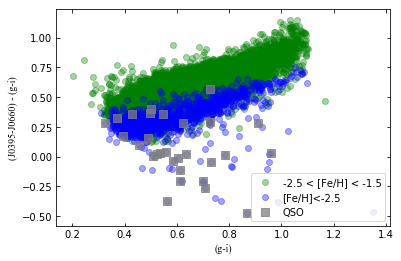

In [34]:
fig, ax = plt.subplots(1,1)


ax.scatter(VAC_15['gSDSS'] - VAC_15['iSDSS'], VAC_15['m_ind'], color="green", alpha=0.35, label='-2.5 < [Fe/H] < -1.5')

ax.scatter(VAC['gSDSS'] - VAC['iSDSS'], VAC['m_ind'], color="blue", alpha=0.35, label='[Fe/H]<-2.5')

ax.scatter(QSO['gSDSS'] - QSO['iSDSS'], QSO['m_ind'], color='grey', marker='s', s=50, label='QSO', alpha=0.75)


ax.set_xlabel("(g-i)", fontname='Times New Roman')
ax.set_ylabel("(J0395-J0660) - (g-i)", fontname='Times New Roman')
ax.legend()

ax.tick_params(direction='in', top=True, right=True)


plt.savefig("FEH_25_Candidates_QSO.png")
plt.show()